In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing

In [2]:
data1 = pd.read_csv('data/historical_data1_2008/historical_data1_Q12008/historical_data1_Q12008_withflag.csv',
                       sep=',', 
                       header=0,
                       names = [
                                'CREDIT_SCORE',
                                'FIRST_PAYMENT_DATE',
                                'FIRST_TIME_HOMEBUYER_FLAG',
                                'NUMBER_OF_UNITS',
                                'OCCUPANCY_STATUS',
                                'ORIGINAL_INCOME_RATIO',
                                'ORIGINAL_UPB',
                                'ORIGINAL_LTV',
                                'ORIGINAL_INTEREST_RATE',
                                'CHANNEL',
                                'PRODUCT_TYPE',
                                'PROPERTY_STATE',
                                'PROPERTY_TYPE',
                                'LOAN_PURPOSE',
                                'ORIGINAL_LOAN_TERM',
                                'NUMBER_OF_BORROWERS',
                                'DEFAULT_FLAG'
                    ])
data2 = pd.read_csv('data/historical_data1_2008/historical_data1_Q22008/historical_data1_Q22008_withflag.csv',
                       sep=',', 
                       header=0,
                       names = [
                                'CREDIT_SCORE',
                                'FIRST_PAYMENT_DATE',
                                'FIRST_TIME_HOMEBUYER_FLAG',
                                'NUMBER_OF_UNITS',
                                'OCCUPANCY_STATUS',
                                'ORIGINAL_INCOME_RATIO',
                                'ORIGINAL_UPB',
                                'ORIGINAL_LTV',
                                'ORIGINAL_INTEREST_RATE',
                                'CHANNEL',
                                'PRODUCT_TYPE',
                                'PROPERTY_STATE',
                                'PROPERTY_TYPE',
                                'LOAN_PURPOSE',
                                'ORIGINAL_LOAN_TERM',
                                'NUMBER_OF_BORROWERS',
                                'DEFAULT_FLAG'
                    ])
data3 = pd.read_csv('data/historical_data1_2008/historical_data1_Q32008/historical_data1_Q32008_withflag.csv',
                       sep=',', 
                       header=0,
                       names = [
                                'CREDIT_SCORE',
                                'FIRST_PAYMENT_DATE',
                                'FIRST_TIME_HOMEBUYER_FLAG',
                                'NUMBER_OF_UNITS',
                                'OCCUPANCY_STATUS',
                                'ORIGINAL_INCOME_RATIO',
                                'ORIGINAL_UPB',
                                'ORIGINAL_LTV',
                                'ORIGINAL_INTEREST_RATE',
                                'CHANNEL',
                                'PRODUCT_TYPE',
                                'PROPERTY_STATE',
                                'PROPERTY_TYPE',
                                'LOAN_PURPOSE',
                                'ORIGINAL_LOAN_TERM',
                                'NUMBER_OF_BORROWERS',
                                'DEFAULT_FLAG'
                    ])
data4 = pd.read_csv('data/historical_data1_2008/historical_data1_Q42008/historical_data1_Q42008_withflag.csv',
                       sep=',', 
                       header=0,
                       names = [
                                'CREDIT_SCORE',
                                #'FIRST_PAYMENT_DATE',
                                'FIRST_TIME_HOMEBUYER_FLAG',
                                #'NUMBER_OF_UNITS',
                                #'OCCUPANCY_STATUS', 降维 Discrete
                                'ORIGINAL_INCOME_RATIO',
                                'ORIGINAL_UPB',
                                'ORIGINAL_LTV',
                                'ORIGINAL_INTEREST_RATE',
                                'CHANNEL',
                                'PRODUCT_TYPE',
                                #'PROPERTY_STATE',
                                'PROPERTY_TYPE',
                                'LOAN_PURPOSE',
                                'ORIGINAL_LOAN_TERM',
                                'NUMBER_OF_BORROWERS',
                                'DEFAULT_FLAG'
                    ])

data_list = [data1,data2,data3,data4] 
data = pd.concat(data_list)

In [3]:
flag = data['DEFAULT_FLAG']
print(flag.value_counts())
# ratio 0.08255

False    1090119
True       89993
Name: DEFAULT_FLAG, dtype: int64


In [4]:
print(data.shape)
print(data)

(1180112, 17)
                    CREDIT_SCORE  FIRST_PAYMENT_DATE  \
0                            771            200803.0   
1                            729            200805.0   
2                            769            200803.0   
3                            755            200803.0   
4                            760            200804.0   
...                          ...                 ...   
(753, 200902, Y, 1)            P                 NaN   
(755, 201203, N, 1)            P                 NaN   
(715, 200902, 9, 1)            P                 NaN   
(680, 201209, 9, 1)            P                 NaN   
(771, 200903, N, 1)            P                 NaN   

                    FIRST_TIME_HOMEBUYER_FLAG  NUMBER_OF_UNITS  \
0                                           N              1.0   
1                                           N              1.0   
2                                           N              1.0   
3                                           Y    

# Imputation

In [4]:
CREDIT_SCORE = data['CREDIT_SCORE']
OIR = data['ORIGINAL_INCOME_RATIO']
LTV = data['ORIGINAL_LTV']
CREDIT_clean = CREDIT_SCORE[CREDIT_SCORE != 9999]
OIR_clean = OIR[OIR != 999]
LTV_clean = LTV[LTV != 999]
data['CREDIT_SCORE'] = data['CREDIT_SCORE'].apply(lambda x : CREDIT_clean.mean() if x == 9999 else x)
data['ORIGINAL_INCOME_RATIO'] = data['ORIGINAL_INCOME_RATIO'].apply(lambda x : OIR_clean.mean() if x == 999 else x)
data['ORIGINAL_LTV'] = data['ORIGINAL_LTV'].apply(lambda x : LTV_clean.mean() if x == 999 else x)

# Get dummy value

In [5]:
input_array = np.c_[
    data[['CREDIT_SCORE',#0
          'ORIGINAL_INCOME_RATIO',#1
          'ORIGINAL_UPB',#2
          'ORIGINAL_LTV',#3
          'ORIGINAL_LOAN_TERM',#4
          'ORIGINAL_INTEREST_RATE'#5
         ]],
    np.asarray(pd.get_dummies(data['FIRST_TIME_HOMEBUYER_FLAG'])),
    np.asarray(pd.get_dummies(data['NUMBER_OF_UNITS'])),
    np.asarray(pd.get_dummies(data['OCCUPANCY_STATUS'])),
    np.asarray(pd.get_dummies(data['CHANNEL'])),
    np.asarray(pd.get_dummies(data['PRODUCT_TYPE'])),
    np.asarray(pd.get_dummies(data['PROPERTY_TYPE'])),
    np.asarray(pd.get_dummies(data['LOAN_PURPOSE'])),
    np.asarray(pd.get_dummies(data['NUMBER_OF_BORROWERS']))    
]

In [6]:
print(input_array)

[[7.71e+02 6.10e+01 2.72e+05 ... 1.00e+00 0.00e+00 0.00e+00]
 [7.29e+02 2.00e+01 8.70e+04 ... 1.00e+00 0.00e+00 0.00e+00]
 [7.69e+02 1.70e+01 5.90e+04 ... 1.00e+00 0.00e+00 0.00e+00]
 ...
 [7.15e+02 4.40e+01 1.76e+05 ... 0.00e+00 1.00e+00 0.00e+00]
 [6.80e+02 4.50e+01 1.58e+05 ... 0.00e+00 1.00e+00 0.00e+00]
 [7.71e+02 3.40e+01 3.72e+05 ... 1.00e+00 0.00e+00 0.00e+00]]


In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
input_array_N = min_max_scaler.fit_transform(input_array)
print(input_array_N)

[[0.85636364 0.9375     0.33417085 ... 1.         0.         0.        ]
 [0.78       0.296875   0.10175879 ... 1.         0.         0.        ]
 [0.85272727 0.25       0.06658291 ... 1.         0.         0.        ]
 ...
 [0.75454545 0.671875   0.21356784 ... 0.         1.         0.        ]
 [0.69090909 0.6875     0.19095477 ... 0.         1.         0.        ]
 [0.85636364 0.515625   0.45979899 ... 1.         0.         0.        ]]


In [8]:
output_array = np.asarray(data['DEFAULT_FLAG'].astype(int))

C:\Users\lenovo\Anaconda3\envs\FYP\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\envs\FYP\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\envs\FYP\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\envs\FYP\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\lenovo\Anaconda3\envs\FYP\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: T

KeyboardInterrupt: 

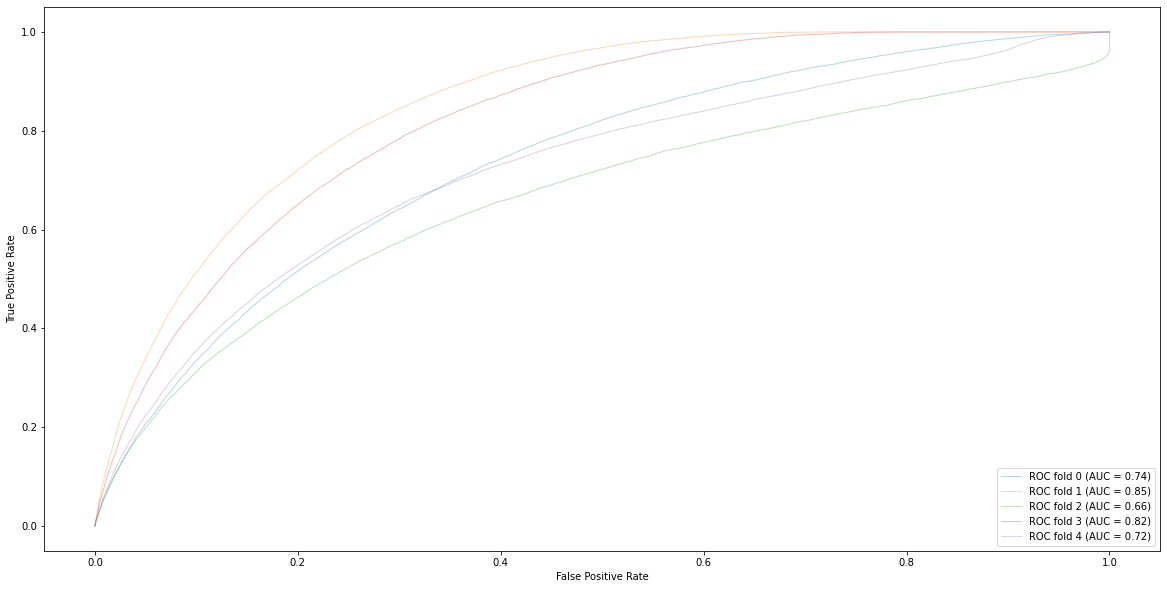

In [9]:
# Try using StratifiedKFold
# Data IO and generation
X = input_array
y = output_array

# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)

classifier = LogisticRegression(solver='saga',max_iter=1500)



tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 500)


fig, ax = plt.subplots(figsize=(20, 10))
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    # put the curve in ax through 'ax = ax'
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

#mean value for each colomn
mean_tpr = np.mean(tprs, axis=0)

mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")

#morgage creddit data   \\us p2p   \\

# Plot note:
## plt ax fig
fig, ax = plt.subplot(figsize=(x,x)) 指定figure和axes然后对axes单独操作

figure是画布，axes是画布上的元素

In [15]:
fig.savefig('./AUC.jpg')